### IMEC2543 - DINAMICA DE MAQUINARIA
### [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) Cod. 202321287
# Taller 1

In [19]:
import numpy as np
from numpy import deg2rad, rad2deg
from sympy import symbols, pi, sin, cos, lambdify, solve, linear_eq_to_matrix, simplify, acos, sqrt
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, express
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paso -1 - Hacer los dibujos y diagramas necesarios


# Paso 0 -  Establecer variables
Vamos a establecer las variables que necesitaremos a lo largo del ejercicio

In [20]:
l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, mJ, mK, mL, mM, mN, mO, mP, mQ, g, t = symbols('l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 mJ mK mL mM mN mO mP mQ g t')

theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8 = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6 theta7 theta8')

# FOAx, FABx, FBCx, FDCx, FOAy, FABy, FBCy, FDCy, Finx, Min, FODy, M_pris = symbols('F_OAx F_ABx F_BCx F_DCx F_OAy F_ABy F_BCy F_DCy F_inx M_in F_ODx M_pris')
params={l1: 0.035, l2: 0.08, l3: 0.08, l4: 0.035, l5: 0.02, l6: 0.02, l7: 0.04, l8: 0.046254, l9: 0.01723, l10: 0.0361, mJ: 1, mK: 1, mL: 1, mM: 1, mN: 1, mO: 1, mP: 1, mQ: 1, g: 9.81}

T=ReferenceFrame('T')

J=T.orientnew('J','Axis',(theta1,T.z))
K=T.orientnew('K','Axis',(theta2,T.z))
L=T.orientnew('L','Axis',(theta3,T.z))
M=T.orientnew('M','Axis',(theta4,T.z))
N=T.orientnew('N','Axis',(theta5,T.z))
O=T.orientnew('O','Axis',(theta6,T.z))
P=T.orientnew('P','Axis',(theta7,T.z))
Q=T.orientnew('Q','Axis',(theta8,T.z))

V=N.orientnew('V','Axis',(deg2rad(95),N.z))

# W=N.orientnew('W','Axis',(-deg2rad(25.515),N.z))

rAB = l2*J.x
rAC = l1*K.x
rCD = l3*L.x
############
rBD = l4*P.x
rIB = l3*P.x
############
rIH = l5*Q.x
rHG = l3*O.x
############
rBF = l7*N.x
# rGF = l8*W.x
rBG = l6*V.x
##########
rEF = l3*M.x
rAE = l10*T.x+l9*T.y

eqLoop1 = rAB+rBD-rCD-rAC
eqLoop2 = rAB+rBF-rEF-rAE
eqLoop3 = -rIB+rIH+rHG-rBG

eqLoop1 = eqLoop1.subs(params)
eqLoop2 = eqLoop2.subs(params)
eqLoop3 = eqLoop3.subs(params)

### Pequeño código para verificar gráficamente que los loops cierran

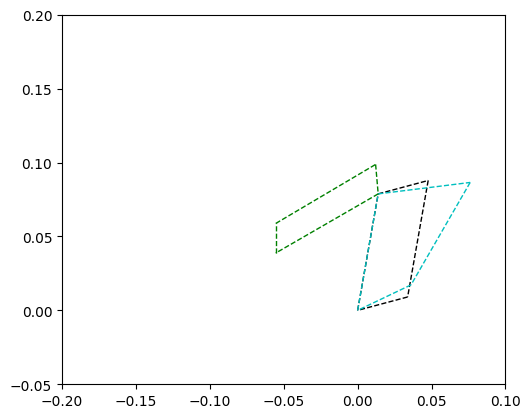

In [21]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


In [22]:
BF = rBF.subs(params)
BG = rBG.subs(params)

angle = acos(
    (BF.dot(BG)) / (sqrt(BF.dot(BF)) * sqrt(BG.dot(BG)))
)

angle = simplify(angle)

display(angle)

rad2deg(float(angle))

1.65806278939461

np.float64(95.0)

In [23]:
eqs = [
    eqLoop1.dot(T.x),
    eqLoop1.dot(T.y),
    eqLoop2.dot(T.x),
    eqLoop2.dot(T.y),
    eqLoop3.dot(T.x),
    eqLoop3.dot(T.y)
]

eqs_fun = lambdify(
    (theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8),
    eqs,
    modules="numpy"
)

# Paso 1  - FK
Como hemos visto en clase el paso 1 es realizar el FK del mecanísmo, pues este nos permitirá en el futuro determinar la posición final del efector daondole los valores de valores de $\theta$, $\dot{\theta}$ y $\dot{\theta}$ 

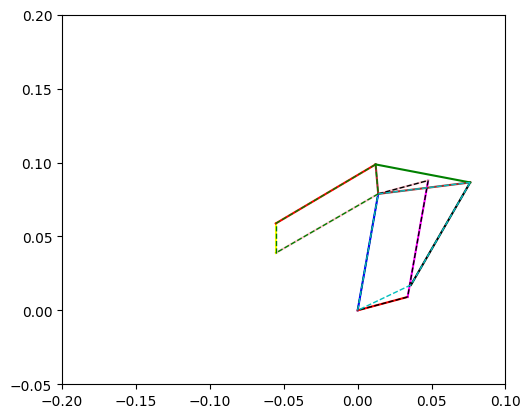

In [24]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([A[0],C[0]], [A[1],C[1]], 'red')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.plot([B[0],D[0]], [B[1],D[1]], 'pink')
    ax.plot([B[0],I[0]], [B[1],I[1]], 'pink')
    ax.plot([I[0],H[0]], [I[1],H[1]], 'yellow')
    ax.plot([H[0],G[0]], [H[1],G[1]], 'red')
    ax.plot([B[0],G[0]], [B[1],G[1]], 'brown')
    ax.plot([E[0],F[0]], [E[1],F[1]], 'black') 
    ax.plot([B[0],F[0]], [B[1],F[1]], 'brown')
    ax.plot([G[0],F[0]], [G[1],F[1]], 'green')
    
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


### Nota sobre el dibujo de arriba
En este las proporciones estan locas porque puse los angulos a ojo para ver cual podría ser un buen first guess, entonces que no cunda el pánico.

In [25]:
def FK(theta1_val, theta2_val, guess):
    """
    Resuelve la cinemática directa encontrando los ángulos desconocidos
    que minimizan el error de cierre geométrico.
    
    theta1_val, theta2_val  -> DOF impuestos
    guess                   -> estimación inicial de [theta3,...,theta8]
    """

    # -------------------------------------------------
    # 1) Definimos el RESIDUAL (error geométrico)
    # -------------------------------------------------
    def residual(theta_u):
        theta3, theta4, theta5, theta6, theta7, theta8 = theta_u
        
        r = eqs_fun(
            theta1_val,
            theta2_val,
            theta3,
            theta4,
            theta5,
            theta6,
            theta7,
            theta8
        )
        
        return np.array(r, dtype=float)

    # -------------------------------------------------
    # 2) Definimos el COSTO escalar = ||r||^2
    # -------------------------------------------------
    def cost(theta_u):
        r = residual(theta_u)
        return np.dot(r, r)   # suma de cuadrados

    # -------------------------------------------------
    # 3) Minimizamos el costo
    # -------------------------------------------------
    result = minimize(
        cost,
        x0=guess,
        method='BFGS',
        options={
            'maxiter': 10000,
            'gtol': 1e-8,
            'disp': True   # para VER la iteración
        }
    )

    # -------------------------------------------------
    # 4) Verificamos convergencia
    # -------------------------------------------------
    if not result.success:
        print("No convergió.")
        print("Costo final:", result.fun)
        raise RuntimeError(result.message)

    print("Convergió.")
    print("Costo final:", result.fun)
    print("Norma residual:", np.sqrt(result.fun))

    return result.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 1.1490635928890586e-14
Norma residual: 1.0719438384957762e-07


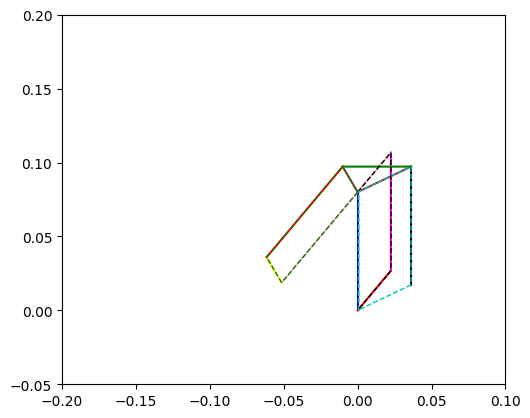

In [26]:
theta1_val = np.deg2rad(90)
theta2_val = np.deg2rad(50)

guess = [
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(90)
]

theta_u_sol = FK(theta1_val, theta2_val, guess)

joint_values = [theta1_val, theta2_val, *theta_u_sol]
plotMechanism(joint_values)
plt.show()

# Paso 1.1  - Animación del mecanismo
Ahora que tenemos un código sólido donde es claro que el mecanismo cierra, ¡Podemos proceder a animarlo!

In [27]:
tList = np.linspace(0, 2*np.pi, 120)

In [28]:
# Movimiento del motor 2, con motor 1 en 90
tList = np.linspace(0, 2*np.pi, 120)

def theta1_traj(t):
    return np.deg2rad(90)          # fijo (cámbialo si quieres)

def theta2_traj(t):
    return np.deg2rad(180 * t / (2*np.pi))

In [29]:
# Movimiento del motor 1 y motor 2 a la par
def theta1_traj(t):
    return np.deg2rad(90 + 10*np.sin(2*t))

def theta2_traj(t):
    return np.deg2rad(45 + 45*np.sin(t))

In [34]:
# Movimiento más realista de ambos motores 
# ---------------- TRAJECTORIA DEFINIDA ----------------
tList = np.linspace(0, 2*np.pi, 150)

# Brazo 1: lento, gran recorrido (90° → 160°)
def theta1_traj(t):
    theta_min = np.deg2rad(90)
    theta_max = np.deg2rad(160)
    return theta_min + (theta_max - theta_min) * 0.5 * (1 - np.cos(0.5 * t))

# Brazo 2: rápido, menor recorrido (0° → 90°)
def theta2_traj(t):
    theta_min = np.deg2rad(0)
    theta_max = np.deg2rad(90)
    return theta_min + (theta_max - theta_min) * 0.5 * (1 - np.cos(t))
# -----------------------------------------------------

In [48]:
# Movimiento de Sergio (No hablamos de Sergio desde el incidente)
# ---------------- TRAJECTORIA DEFINIDA ----------------
tList = np.linspace(0, 2*np.pi, 150)

# Brazo 1: lento, gran recorrido (90° → 160°)
def theta2_traj(t):
    return np.deg2rad(0)          # fijo (cámbialo si quieres)

# Brazo 2: rápido, menor recorrido (0° → 90°)
def theta1_traj(t):
    return deg2rad(90) + deg2rad(10)*np.sin(deg2rad(360)*t/3)
# -----------------------------------------------------

In [49]:
theta_u_hist = []

# guess inicial (muy importante que cierre bien)
theta_u0 = np.deg2rad([80, 60, 0, 30, 30, 90])

for i, t in enumerate(tList):
    theta1_val = theta1_traj(t)
    theta2_val = theta2_traj(t)

    theta_u_sol = FK(theta1_val, theta2_val, theta_u0)

    theta_u_hist.append(theta_u_sol)
    theta_u0 = theta_u_sol   # continuation 🔑

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 3.021012318676818e-16
Norma residual: 1.738105957264061e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 6.64428741596159e-14
Norma residual: 2.5776515311348024e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 4.83648829776301e-14
Norma residual: 2.1992017410330983e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 3.750817133446583e-14
Norma resi

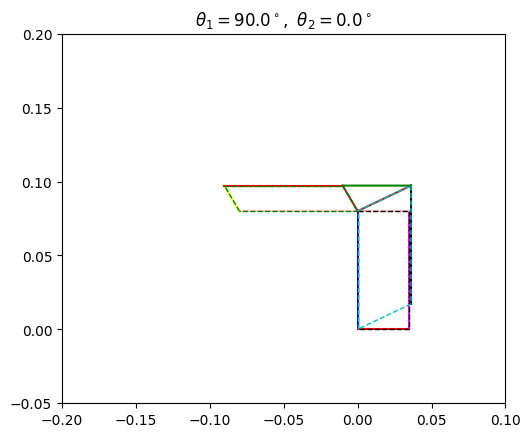

In [50]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()

    theta1_val = theta1_traj(tList[i])
    theta2_val = theta2_traj(tList[i])
    theta_u_val = theta_u_hist[i]

    joint_values = [
        theta1_val,
        theta2_val,
        *theta_u_val
    ]

    plotMechanism(joint_values, ax)

    ax.set_title(
        rf"$\theta_1={np.rad2deg(theta1_val):.1f}^\circ,\ "
        rf"\theta_2={np.rad2deg(theta2_val):.1f}^\circ$"
    )

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(tList),
    interval=80,
    repeat=False
)

In [51]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [52]:
# Esto es para guardarlo en .gif
# anim.save("mechanism.gif", writer="pillow", fps=15)

In [53]:
# Esto es para guardarlo en .mp4
# anim.save("mechanism.mp4", writer="ffmpeg",fps=30)

# Paso 2 - Dinámica Inversa
En dinámica las incognitas son los momentos y fuerzas, por la cantidad de cuerpos (4) podemos entonces encontar 12 ecuaciones en el sistema, las cuales tenemos que escribir.

In [ ]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}

com = {'A': r1/2, 
       'B': r1+(l2/3)*B.x+(l4/3)*B.y, 
       'C': r1+r2+(r3/2), 
       'D': r1+r2+r3 # Asumo que este es puntual
       }


acc_old = {
    'A': com['A'].diff(t, N).diff(t, N),
    'B': com['B'].diff(t, N).diff(t, N),
    'C': com['C'].diff(t, N).diff(t, N),
    'D': com['D'].diff(t, N).diff(t, N)

}

acc = {
    k: v.express(N).diff(t, N).diff(t, N)
    for k, v in com.items()
}

weights = {
    'A': -ma*g*N.y,
    'B': -mb*g*N.y,
    'C': -mc*g*N.y,
    'D': -md*g*N.y
}

inertia_G = {
    'A': (1/12)*ma*l1**2,
    'B': (1/18)*mb*(l2**2 + l4**2),  # triángulo plano (aprox razonable)
    'C': (1/12)*mc*l3**2,
    'D': 0
}

alpha = {
    'A': A.ang_acc_in(N).dot(N.z),
    'B': B.ang_acc_in(N).dot(N.z),
    'C': C.ang_acc_in(N).dot(N.z),
    'D': 0
}



NameError: name 'r1' is not defined

In [ ]:
C.ang_acc_in(N).dot(N.z)

Derivative(theta1(t), (t, 2)) - Derivative(theta2(t), (t, 2)) - Derivative(theta3(t), (t, 2))

In [ ]:
FOA = FOAx*N.x + FOAy*N.y
FAB = FABx*N.x + FABy*N.y
FBC = FBCx*N.x + FBCy*N.y
FDC = FDCx*N.x + FDCy*N.y

r_GA_O = points['O'] - com['A']
r_GA_P = points['P'] - com['A']

r_GB_P = points['P'] - com['B']
r_GB_Q = points['Q'] - com['B']

r_GC_Q = points['Q'] - com['C']
r_GC_R = points['R'] - com['C']

r_GD_R = points['R'] - com['D']

In [ ]:
# Cuerpo A
eqFAx = FOAx - FABx - ma * acc['A'].dot(N.x)
eqFAy = FOAy - FABy + weights['A'].dot(N.y) - ma * acc['A'].dot(N.y)
eqMA = Min + r_GA_O.cross(FOA).dot(N.z) + r_GA_P.cross(-FAB).dot(N.z) - inertia_G['A'] * alpha['A']
# Cuerpo B
eqFBx = FABx -FBCx - mb * acc['B'].dot(N.x)
eqFBy = FABy -FBCy + weights['B'].dot(N.y) - mb * acc['B'].dot(N.y)
eqMB = r_GB_P.cross(FAB).dot(N.z) + r_GB_Q.cross(-FBC).dot(N.z) - inertia_G['B'] * alpha['B']

# Cuerpo C
eqFCx = FBCx + FDCx - mc * acc['C'].dot(N.x)
eqFCy = FBCy + FDCy + weights['C'].dot(N.y) - mc * acc['C'].dot(N.y)
eqMC = r_GC_Q.cross(FBC).dot(N.z) + r_GC_R.cross(FDC).dot(N.z) - inertia_G['C'] * alpha['C']

# Cuerpo D
eqFDx = Finx -FDCx - md * acc['D'].dot(N.x)
eqFDy = FODy -FDCy + weights['D'].dot(N.y) - md * acc['D'].dot(N.y)
eqMD = M_pris + r_GD_R.cross(-FDC).dot(N.z) - inertia_G['D'] * alpha['D'] # La verdad no importa mucho



In [ ]:
eqList = [
    eqFAx, eqFAy, eqMA,
    eqFBx, eqFBy, eqMB,
    eqFCx, eqFCy, eqMC,
    eqFDx, eqFDy, eqMD
]


In [ ]:
unknowns = [
    FOAx, FOAy,
    FABx, FABy,
    FBCx, FBCy,
    FDCx, FDCy,
    FODy, Finx,
    Min, M_pris
]

In [ ]:
FF, bf = linear_eq_to_matrix(eqList, unknowns)

In [ ]:
FF.subs(params)

Matrix([
[                 1,                   0,                                                                                                                                                -1,                                                                                                                                                  0,                                                                                                                                                                        0,                                                                                                                                                                         0,                                                                                                                                                                       0,                                                                                                                                                 

In [ ]:
bf.subs(params)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
FF.shape, bf.shape


((12, 12), (12, 1))

# Paso 2.1 - Dinámica Inversa + FK
Vamos a resolver para las incognitas, pero debemos primero calcular los theetas

In [ ]:
dtheta1 = theta1.diff()
dtheta2 = theta2.diff()
dtheta3 = theta3.diff()

ddtheta1 = theta1.diff(t,2)
ddtheta2 = theta2.diff(t,2)
ddtheta3 = theta3.diff(t,2)

dx = x.diff()
ddx = x.diff(t,2)


In [ ]:
start_angle = deg2rad(50)
end_angle = deg2rad(75)
dtheta1_val = 3
tiempo = (end_angle - start_angle) / dtheta1_val
delta = end_angle - start_angle
print(delta)
tt = np.linspace(0,tiempo,100)

theta1_val = np.linspace(start_angle, end_angle, 100)

x_val = 0.7+0.05*np.sin(5*tt)

# Inicializamos resultados
theta2_val = []
theta3_val = []

# Semilla inicial
# z0_current = [np.deg2rad(-50), np.deg2rad(20)]
z0_current = [-0.5, 2]

for i in range(len(tt)):
    theta1_i = theta1_val[i]
    x_i = x_val[i]

    try:
        # Llamamos a FK con z0 actualizado
        z_next = FK([theta1_i, x_i], z0=z0_current)
    except RuntimeError as e:
        print(f"No convergió en i={i}, theta1={theta1_i:.3f}, x={x_i:.3f}")
        # Opcional: usar z0 anterior como "fallback"
        z_next = z0_current

    # Guardamos resultado
    theta2_val.append(z_next[0])
    theta3_val.append(z_next[1])

    # Actualizamos z0 para la siguiente iteración
    z0_current = z_next

theta2_val = np.array(theta2_val)
theta3_val = np.array(theta3_val)

0.43633231299858244


In [ ]:
for i in range(5):
    print(f"{i}: theta1={theta1_val[i]:.3f}, x={x_val[i]:.3f}, theta2={theta2_val[i]:.3f}, theta3={theta3_val[i]:.3f}")


0: theta1=0.873, x=0.700, theta2=-0.521, theta3=1.825
1: theta1=0.877, x=0.700, theta2=-0.509, theta3=1.818
2: theta1=0.881, x=0.701, theta2=-0.496, theta3=1.810
3: theta1=0.886, x=0.701, theta2=-0.484, theta3=1.803
4: theta1=0.890, x=0.701, theta2=-0.471, theta3=1.795


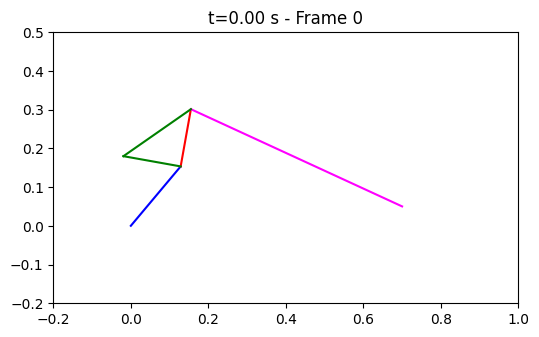

In [ ]:
# Asegurarte de que los resultados están en arrays

fig, ax = plt.subplots(figsize=(6,6))

def update(i):
    ax.clear()
    # plotMechanism recibe [theta1, theta2, theta3, x]
    plotMechanism([theta1_val[i], theta2_val[i], theta3_val[i], x_val[i]], ax)
    ax.set_title(f"t={tt[i]:.2f} s - Frame {i}")
    ax.set_aspect('equal')
    
anim = animation.FuncAnimation(fig, update, frames=len(tt), repeat=False, interval=100)

# Mostrar como animación JS
HTML(anim.to_jshtml())


In [ ]:
theta1_val = np.linspace(start_angle, end_angle, 100)
x_val = 0.7+.005*np.sin(5*tt)


dtheta1_val = np.full(100, 3)
dtheta2_val = np.gradient(theta2_val, tt, edge_order=2)
dtheta3_val = np.gradient(theta3_val, tt, edge_order=2)
dx_val = np.gradient(x_val, tt, edge_order=2)

ddtheta1_val = np.zeros(100)
ddtheta2_val = np.gradient(dtheta2_val, tt, edge_order=2)
ddtheta3_val = np.gradient(dtheta3_val, tt, edge_order=2)
ddx_val = np.gradient(dx_val, tt, edge_order=2)

In [ ]:
# Vector de posiciones
q_list = np.column_stack((theta1_val, theta2_val, theta3_val, x_val))

# Vector de velocidades
q_dot_list = np.column_stack((
    np.full_like(theta1_val, 3.0),  # theta1 constante
    dtheta2_val,
    dtheta3_val,
    dx_val
))

# Vector de aceleraciones
q_ddot_list = np.column_stack((
    np.zeros_like(theta1_val),  # ddtheta1 = 0
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
))


In [ ]:
# Sustituir valores numéricos (incluyendo thetas)
FF_num = FF.subs(params)
bf_num = bf.subs(params)

# Resolver sistema lineal
sol = FF_num.LUsolve(bf_num)

# Asociar resultados con incógnitas
solution_dict = dict(zip(unknowns, sol))

solution_dict


{F_OAx: -1.2*(sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*sin(theta3(t))*Derivative(theta3(t), (t, 2)) - 1.2*(sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*cos(theta3(t))*Derivative(theta3(t), t)**2 + 1.2*(-sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))*sin(theta3(t))*Derivative(theta3(t), t)**2 - 1.2*(-sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))*cos(theta3(t))*Derivative(theta3(t), (t, 2)) - 2.4*(-sin(theta1(t))*sin(theta2(t))*Derivative(theta1(t), t) + sin(theta1(t))*sin(theta2(t))*Derivative(theta2(t), t) - cos(theta1(t))*cos(theta2(t))*Derivative(theta1(t), t) + cos(theta1(t))*cos(theta2(t))*Derivative(theta2(t), t))*cos(theta3(t))*Derivative(theta3(t), t) - 2.4*(-sin(theta1(t))*cos(theta2(t))*Derivative(theta1(t), t) + sin(theta1(t))*cos(theta2(t))*Derivative(theta2(t), t) + sin(theta2(t))*cos(theta1(t))*Derivative(theta1(t), t) - sin(theta2(t))*cos(theta1(t))*Derivative(theta2(t), t))*sin(theta3(t))*Derivative

In [ ]:
solution_dict[Min]

Min_fin = lambdify([theta1, theta2, theta3, x, dtheta1, dtheta2, dtheta3, dx, ddtheta1, ddtheta2, ddtheta3, ddx], solution_dict[Min])

Min_fin(theta1_val[0], theta2_val[0], theta3_val[0], x_val[0], dtheta1_val[0], dtheta2_val[0], dtheta3_val[0], dx_val[0], ddtheta1_val[0], ddtheta2_val[0], ddtheta3_val[0], ddx_val[0])

np.float64(5.273376103744065)

In [ ]:
Min_time = Min_fin(
    theta1_val,
    theta2_val,
    theta3_val,
    x_val,
    dtheta1_val,
    dtheta2_val,
    dtheta3_val,
    dx_val,
    ddtheta1_val,
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
)

In [ ]:
M_promedio = np.mean(Min_time)

In [ ]:
print("Torque promedio:", np.mean(Min_time))
print("Torque máximo:", np.max(Min_time))
print("Torque mínimo:", np.min(Min_time))

Torque promedio: 2.939532890999823
Torque máximo: 5.273376103744065
Torque mínimo: 0.5517195847886428


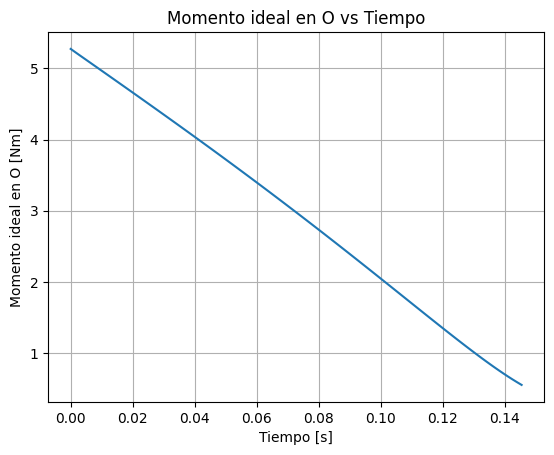

In [ ]:
plt.figure()
plt.plot(tt, Min_time)
plt.xlabel("Tiempo [s]")
plt.ylabel("Momento ideal en O [Nm]")
plt.title("Momento ideal en O vs Tiempo")
plt.grid()
plt.show()


In [ ]:
solution_dict[Finx]

Finx_fin = lambdify([theta1, theta2, theta3, x, dtheta1, dtheta2, dtheta3, dx, ddtheta1, ddtheta2, ddtheta3, ddx], solution_dict[Finx])

Finx_fin(theta1_val[0], theta2_val[0], theta3_val[0], x_val[0], dtheta1_val[0], dtheta2_val[0], dtheta3_val[0], dx_val[0], ddtheta1_val[0], ddtheta2_val[0], ddtheta3_val[0], ddx_val[0])

np.float64(1.2010471675369667)

In [ ]:
Finx_time = Finx_fin(
    theta1_val,
    theta2_val,
    theta3_val,
    x_val,
    dtheta1_val,
    dtheta2_val,
    dtheta3_val,
    dx_val,
    ddtheta1_val,
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
)

In [ ]:
print("Fuerza promedio:", np.mean(Finx_time))
print("Fuerza máxima:", np.max(Finx_time))
print("Fuerza mínima:", np.min(Finx_time))

Fuerza promedio: -4.400111110672469
Fuerza máxima: 1.2010471675369667
Fuerza mínima: -7.720471944345283


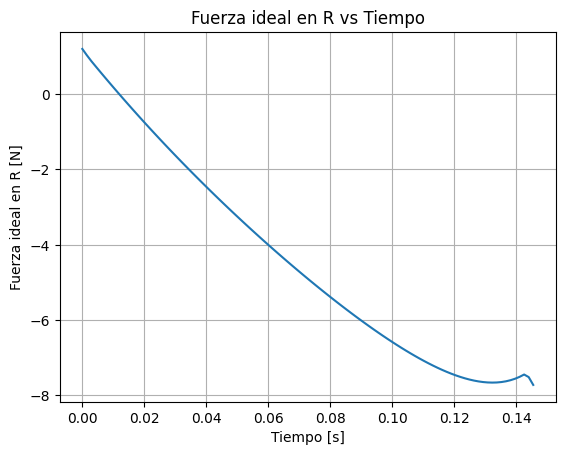

In [ ]:
plt.figure()
plt.plot(tt, Finx_time)
plt.xlabel("Tiempo [s]")
plt.ylabel("Fuerza ideal en R [N]")
plt.title("Fuerza ideal en R vs Tiempo")
plt.grid()
plt.show()


# Paso 3 - Dinámica Directa

In [ ]:
eqLoopdot = eqLoop.diff(t, N)
eqLoopddot = eqLoopdot.diff(t, N)

eqVel = [
    eqLoopdot.dot(N.x),
    eqLoopdot.dot(N.y)
]

eqVelParams = [expr.subs(params) for expr in eqVel]

eq_vel_fun = lambdify(
    [theta1, theta2, theta3, x,
     theta1.diff(t), theta2.diff(t), theta3.diff(t), x.diff(t)],
    eqVelParams
)

eqAcc = [
    eqLoopddot.dot(N.x),
    eqLoopddot.dot(N.y)
]

eqAccParams = [expr.subs(params) for expr in eqAcc]

eq_acc_fun = lambdify(
    [
        theta1, theta2, theta3, x,
        theta1.diff(t), theta2.diff(t), theta3.diff(t), x.diff(t),
        theta1.diff(t,2), theta2.diff(t,2), theta3.diff(t,2), x.diff(t,2)
    ],
    eqAccParams
)



In [ ]:
def FA(theta1_val, theta2_val, theta3_val, x_val,
       dtheta1_val, dtheta2_val, dtheta3_val, dx_val,
       ddtheta1_val, ddx_val,
       z0=None):

    if z0 is None:
        z0 = [0.0, 0.0]

    def acc_eq(z):
        ddtheta2_val, ddtheta3_val = z

        return eq_acc_fun(
            theta1_val, theta2_val, theta3_val, x_val,
            dtheta1_val, dtheta2_val, dtheta3_val, dx_val,
            ddtheta1_val, ddtheta2_val, ddtheta3_val, ddx_val
        )

    sol = fsolve(acc_eq, z0)
    return sol


In [ ]:
def FV(theta1_val, theta2_val, theta3_val, x_val,
       dtheta1_val, dx_val,
       z0=None):

    if z0 is None:
        z0 = [0.0, 0.0]

    def vel_eq(z):
        dtheta2_val, dtheta3_val = z

        return eq_vel_fun(
            theta1_val, theta2_val, theta3_val, x_val,
            dtheta1_val, dtheta2_val, dtheta3_val, dx_val
        )

    sol = fsolve(vel_eq, z0)
    return sol


In [ ]:
unknowns_fd = [
    FOAx, FOAy,
    FABx, FABy,
    FBCx, FBCy,
    FDCx, FDCy,
    FODy, Finx,
    ddtheta1,   # ← ahora es incógnita
    M_pris
]


In [ ]:
FF_fd, bf_fd = linear_eq_to_matrix(eqList, unknowns_fd)


In [ ]:
FF_fd = FF_fd.subs(params)
bf_fd = bf_fd.subs(params)


In [ ]:
FF_fd_fun = lambdify(
    [theta1, theta2, theta3, x,
     dtheta1, dtheta2, dtheta3, dx,
     Min, ddtheta2, ddtheta3, ddx],
    FF_fd,
    modules="numpy"
)

bf_fd_fun = lambdify(
    [theta1, theta2, theta3, x,
     dtheta1, dtheta2, dtheta3, dx,
     Min, ddtheta2, ddtheta3, ddx],
    bf_fd,
    modules="numpy"
)


In [ ]:
def dynamics(y, t):

    theta1_val = float(y[0])
    omega1_val = float(y[1])

    # Movimiento impuesto del deslizador
    x_val = 0.7 + 0.05*np.sin(5*t)
    dx_val = 0.05*5*np.cos(5*t)
    ddx_val = -0.05*25*np.sin(5*t)

    theta2_val, theta3_val = FK([theta1_val, x_val])

    dtheta2_val, dtheta3_val = FV(
        theta1_val,
        theta2_val,
        theta3_val,
        x_val,
        omega1_val,
        dx_val
    )

    A_num = FF_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, 0.0, 0.0, ddx_val
    )

    b_num = bf_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, 0.0, 0.0, ddx_val
    )

    A_num = np.array(A_num, dtype=float)
    b_num = np.array(b_num, dtype=float).flatten()

    sol = np.linalg.solve(A_num, b_num)

    ddtheta1_val = float(sol[10])

    ddtheta2_val, ddtheta3_val = FA(
        theta1_val,
        theta2_val,
        theta3_val,
        x_val,
        omega1_val,
        dtheta2_val,
        dtheta3_val,
        dx_val,
        ddtheta1_val,
        ddx_val
    )

    A_num = FF_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, ddtheta2_val, ddtheta3_val, ddx_val
    )

    b_num = bf_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, ddtheta2_val, ddtheta3_val, ddx_val
    )

    A_num = np.array(A_num, dtype=float)
    b_num = np.array(b_num, dtype=float).flatten()

    sol = np.linalg.solve(A_num, b_num)

    ddtheta1_val = float(sol[10])

    return [omega1_val, ddtheta1_val]


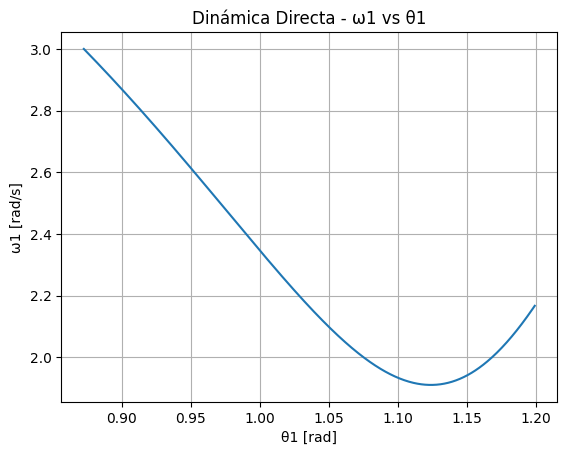

In [ ]:
from scipy.integrate import odeint

y0 = [start_angle, 3.0]

t_sim = np.linspace(0, tiempo, 500)

sol_dir = odeint(dynamics, y0, t_sim)

theta1_dir = sol_dir[:,0]
omega1_dir = sol_dir[:,1]

plt.figure()
plt.plot(theta1_dir, omega1_dir)
plt.xlabel("θ1 [rad]")
plt.ylabel("ω1 [rad/s]")
plt.title("Dinámica Directa - ω1 vs θ1")
plt.grid()
plt.show()


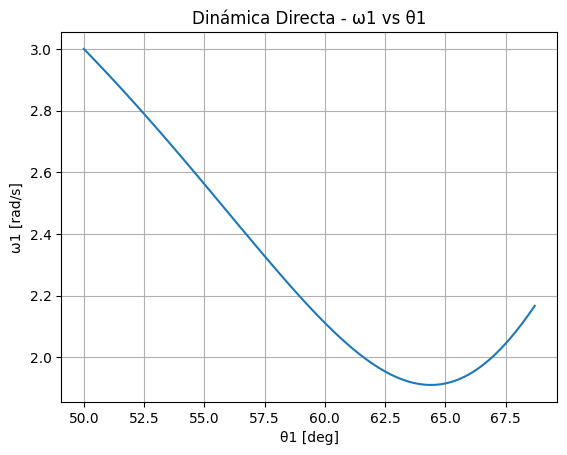

In [ ]:
from scipy.integrate import odeint
from numpy import rad2deg

y0 = [start_angle, 3.0]

t_sim = np.linspace(0, tiempo, 100)

sol_dir = odeint(dynamics, y0, t_sim)

theta1_dir = sol_dir[:,0]
omega1_dir = sol_dir[:,1]

plt.figure()
plt.plot(rad2deg(theta1_dir), omega1_dir)
plt.xlabel("θ1 [deg]")
plt.ylabel("ω1 [rad/s]")
plt.title("Dinámica Directa - ω1 vs θ1")
plt.grid()
plt.show()
